# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

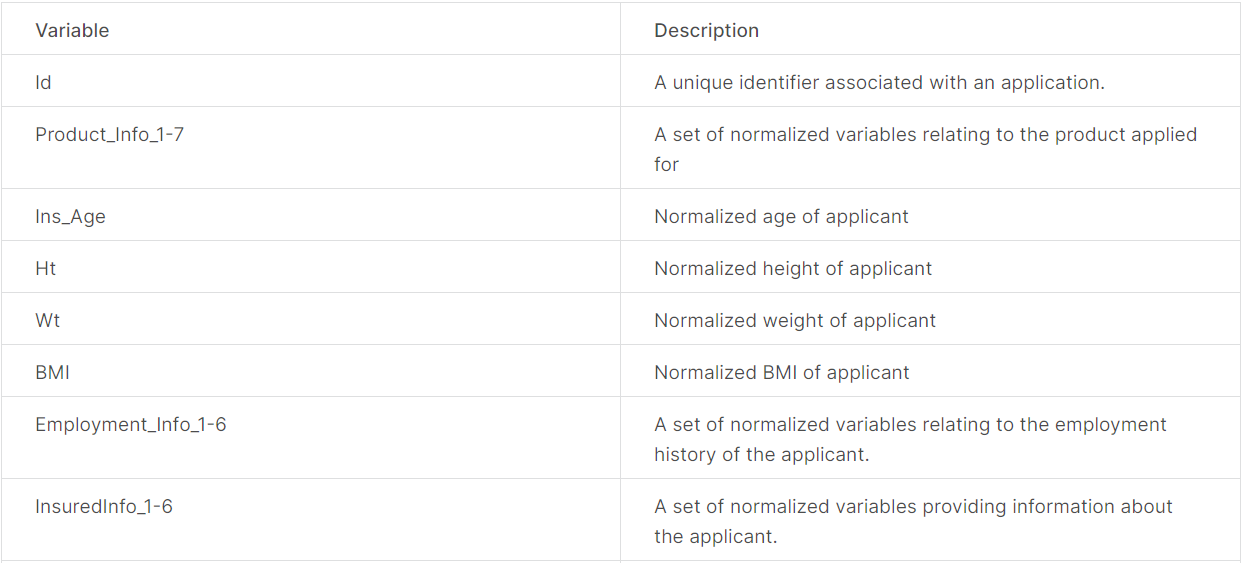

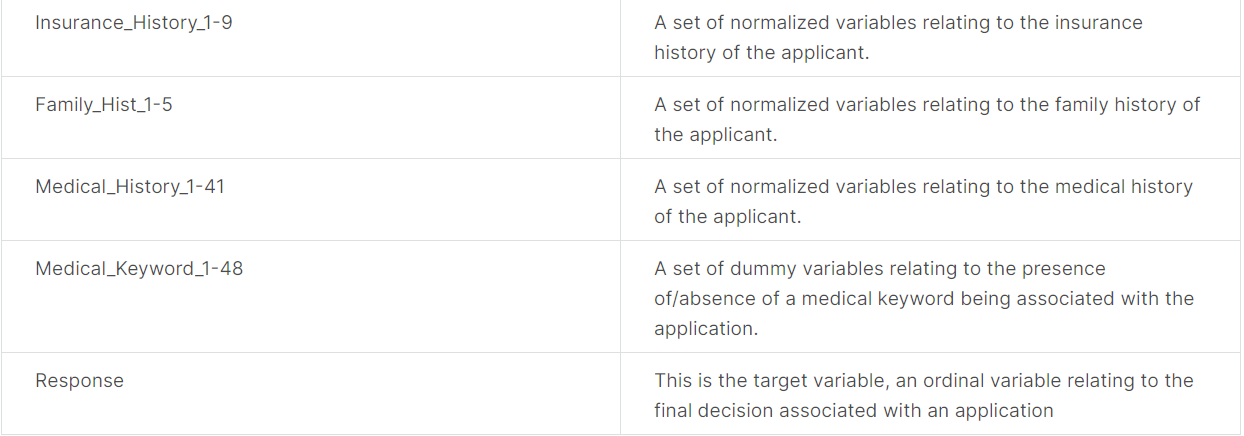

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost

In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('/content/train.csv')
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


<h1><I>1. Handling NaN values

In [3]:
nan_col = [col for col in data.columns if data[col].isna().sum()>0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


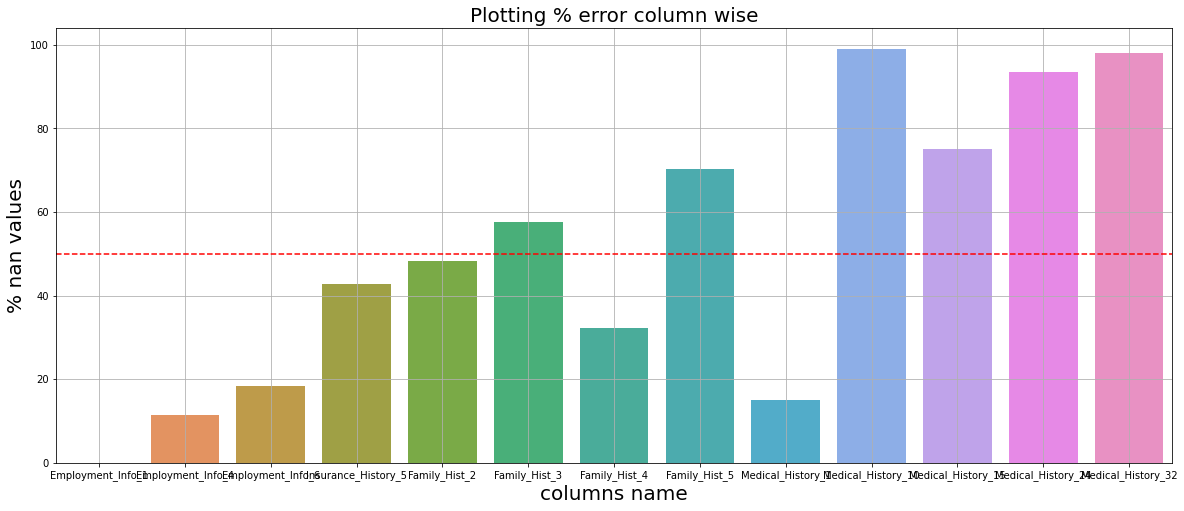

In [4]:
nan_per = []
for col in nan_col:
  nan_per.append(100 * data[col].isna().sum() / data.shape[0])

plt.figure(figsize=(20,8))
sns.barplot(nan_col,nan_per)
plt.axhline(y=50, color='r', linestyle='--')
plt.title('Plotting % error column wise',fontsize=20)
plt.ylabel('% nan values',fontsize=20)
plt.xlabel('columns name',fontsize=20)
plt.grid(True)
plt.show()

<h1><I>1. The horizontal dotted line draws a threshold of 50%. We will be dropping the columns with NaN values more than 50%.<br>2. Filling NaN values with the median of the data.


In [5]:
nan_per_50 = [col for col in data.columns if data[col].isna().sum()/data.shape[0]>0.5]
print('Total columns to be dropped : ',len(nan_per_50))
print(nan_per_50)

Total columns to be dropped :  6
['Family_Hist_3', 'Family_Hist_5', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']


<h1><I>2. Studying Correlation 

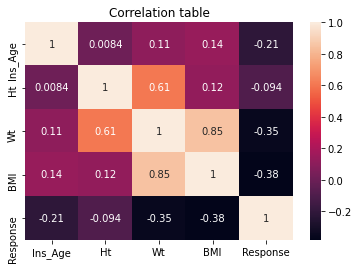

In [6]:
col = ['Ins_Age','Ht','Wt','BMI',"Response"]
sns.heatmap(data[col].corr(), annot=True)
plt.title('Correlation table')
plt.show()

<h1><I>Dropping Wt column from the dataset as we can see high correlation among Wt and BMI.

In [7]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

<h1><I>Conclusion : <br>
1. Ht : We can  see that Min value of the Weight is 0 which is weired as weight cann not be 0.<br>
2. BMI : Same with this column, Min value can not be 0.

In [8]:
def norm_plot(col):
  sns.distplot(data[col])
  plt.title(col+' normal plot')
  plt.show()

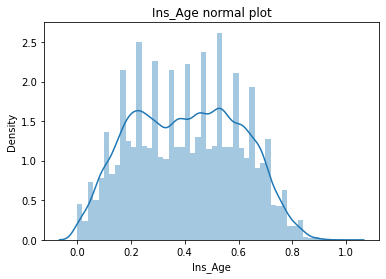

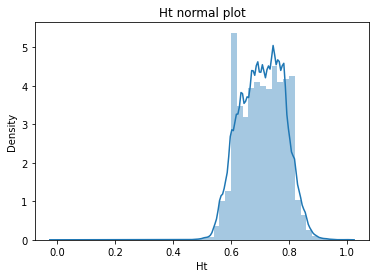

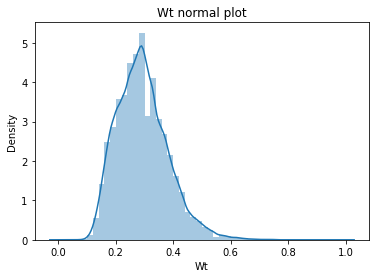

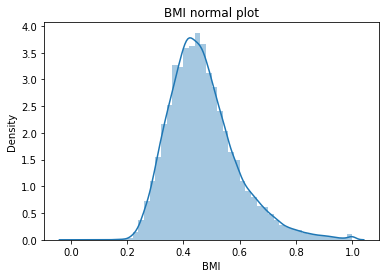

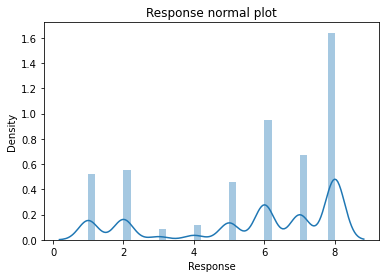

In [9]:
import warnings
warnings.filterwarnings('ignore')

for col in col:
  sns.distplot(data[col])
  plt.title(col+' normal plot')
  plt.show()

<h1><I>The distribution of columns looks quite normal, So no processing needed.

<h1><I>3. Target column 'Response' analysis 
<h3><I>The target value <=7 means uninsured and target value >=8 is insured.

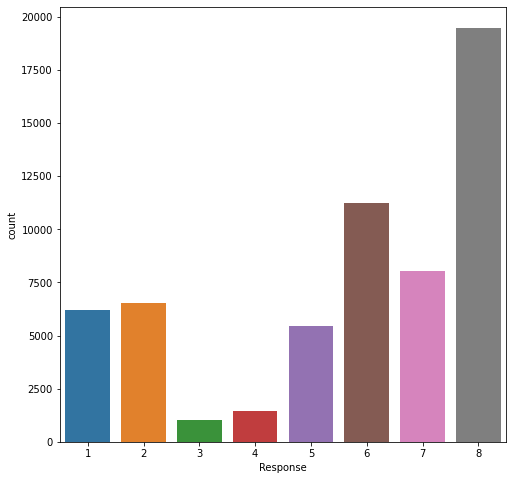

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data['Response'])
plt.show()

In [11]:
response = np.where(data['Response'] == 8, 1,0) 

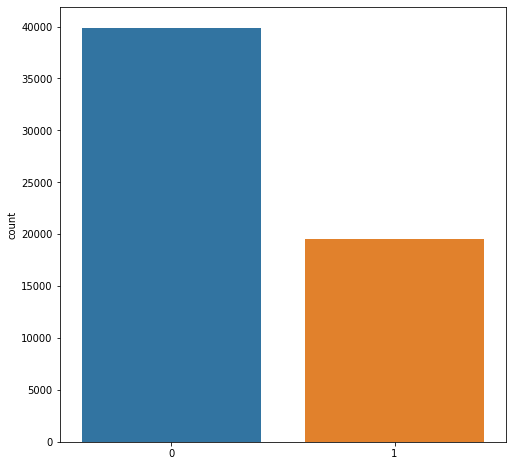

Share of minority data in the dataset : 0.3282026237348647


In [12]:
plt.figure(figsize=(8,8))
sns.countplot(response)
plt.show()

print(f'Share of minority data in the dataset : {sum(response) / len(response)}') 

The minority data size is significant, We won't be changing the demographics.

<h1><I>4. Categorical column analysis

In [13]:
print(f"Categorical column is/are : {[col for col in data.columns if data[col].dtype=='object']}")

Categorical column is/are : ['Product_Info_2']


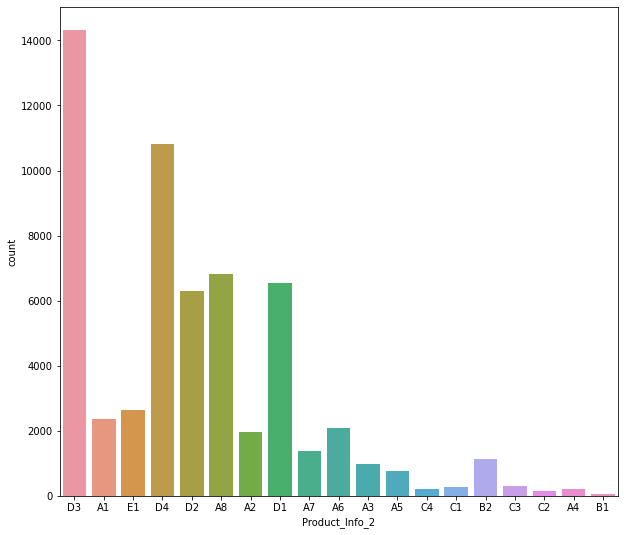

In [14]:
#Counting number of categories in on;y categorical column 
plt.figure(figsize=(10,9))
sns.countplot(data['Product_Info_2'])
plt.show()

<h1><I>5.Data Transformations

In [15]:
#1
data_c = data.copy()

In [16]:
#2
data_c.drop(nan_per_50,axis=1,inplace=True)

In [17]:
#3
data_c.drop('Wt',axis=1,inplace=True)

#4
data_c['Wt'] = np.where(data['Wt'] ==0 , data['Wt'].median(),data['Wt'])

In [18]:
#5
data_c['BMI'] = np.where(data['BMI'] ==0 , data['BMI'].median(),data['BMI'])

In [19]:
#6
data_c['Response'] = response

In [20]:
nan_col = [col for col in data_c.columns if data_c[col].isna().sum()>0]

In [21]:
#7
def fill_na(data, train_data):
  return data.fillna(train_data.median())


In [22]:
data_c = fill_na(data_c,data_c)

In [23]:
data_c.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43',
       'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_46',
       'Medical_Keyword_47', 'Medical_Keyword_48', 'Response', 'Wt'],
      dtype='object', length=122)

<h1><I>6. Vectorization

In [25]:
def tfidf_vec(data,train_data):
  from sklearn.feature_extraction.text import TfidfVectorizer
  tfidf = TfidfVectorizer()
  tfidf.fit(train_data)
  return tfidf, tfidf.transform(data).todense()

In [26]:
tfidf, cat_vec = tfidf_vec(data_c['Product_Info_2'],data_c['Product_Info_2'])
cat_vec

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
def one_hot_enc(data,train_data):
  one_hot = OneHotEncoder()
  one_hot.fit(np.array(train_data).reshape(-1,1))
  return one_hot, one_hot.transform(np.array(data).reshape(-1,1)).todense()

one_hot_encoder, cat_one_hot = one_hot_enc(data_c['Product_Info_2'],data_c['Product_Info_2'])
cat_one_hot.shape

(59381, 19)

In [28]:
import pickle
pickle.dump(one_hot_encoder,open('/content/one_hot_encoder.pkl','wb'))

<h1><I>7. Data preparation

In [29]:
cat_vec.shape

(59381, 19)

In [30]:
response = data_c['Response']
data_c.drop(['Id','Response'],axis=1,inplace=True)

In [31]:
data_c.drop('Product_Info_2',axis=1,inplace=True)

In [32]:
data_c_one_hot = np.hstack((data_c.values,cat_one_hot))

In [33]:
data_c.shape, data_c_one_hot.shape

((59381, 119), (59381, 138))

In [34]:
X,x,Y,y = train_test_split(data_c_one_hot, response, test_size =  0.25, random_state = 65, stratify = response)

In [35]:
def Standard_Scaler(train_data):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  vec = scaler.fit_transform(train_data)

  return scaler, vec

In [36]:
scaler_model , X = Standard_Scaler(X)
x = scaler_model.transform(x) 

In [37]:
pickle.dump(scaler_model,open('/content/scaler_model.pkl','wb'))

<h1><I>8. Model Exploration

<h3><I>1. Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
params = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
cross_val = GridSearchCV(model_1,params,cv=5)
cross_val.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [122]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

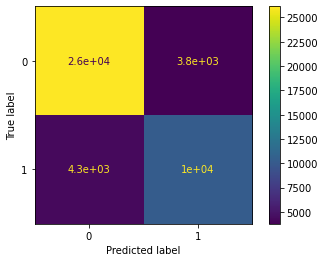

In [123]:
plot_confusion_matrix(lr, X, Y)

In [124]:
print('The Recall value for Unisured member of the family is : ', 26000 / (26000+3800))

The Recall value for Unisured member of the family is :  0.87248322147651


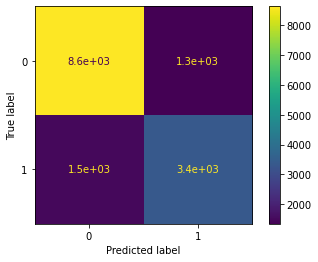

In [125]:
plot_confusion_matrix(lr, x, y)

In [126]:
print('The Recall value for Unisured member of the family on Test data is : ', 8600 / (8600+1300))

The Recall value for Unisured member of the family on Test data is :  0.8686868686868687


In [129]:
print(f'The ROC score for the test data : {roc_auc_score(y,lr.predict(x))}')

The ROC score for the test data : 0.7796099497445411


<h3><I>2. Random Forest

In [130]:
model_2 = RandomForestClassifier()
params = {'n_estimators': [1,3,5,7,9,11,13,17,27,33,37,39,41,47,49,51,71,87,99,101,121,151,171,201,301,501],
          'max_depth' : [1,3,7,10,10,30,40,50,60,70,80,90,100]
         }
cross_val = RandomizedSearchCV(model_2,params)
cross_val.fit(X,Y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [131]:
rf = RandomForestClassifier(bootstrap=True,
                            ccp_alpha=0.0,
                            class_weight=None,
                            criterion='gini',
                            max_depth=None,
                            max_features='auto',
                            max_leaf_nodes=None,
                            max_samples=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100,
                            random_state=None,
                            verbose=0,
                            warm_start=False
                            )
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

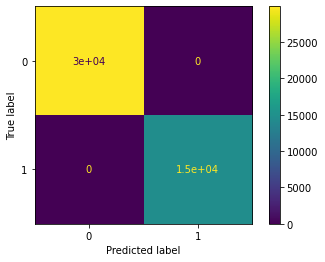

In [132]:
plot_confusion_matrix(rf,X,Y)

In [133]:
print(f"Recall score on train data : {30000/(30000)}")

Recall score on train data : 1.0


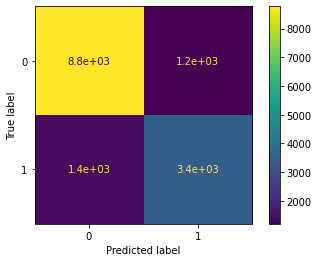

In [134]:
plot_confusion_matrix(rf,x,y)

In [135]:
print(f"Recall score on test data : {8800/(8800+1200)}")

Recall score on test data : 0.88


In [136]:
print(f"ROC score of the test data : {roc_auc_score(rf.predict(x),y)}")

ROC score of the test data : 0.8002886332653918


<h3><I>3. GBDT

learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,

In [138]:
model_3 = GradientBoostingClassifier()
params = {'learning_rate':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
          'n_estimators': [1,10,15,21,31,41,51,101,201,301,401,501],
          'max_depth': [1,3,7,10,15,20,31,51,61,71,81,91,100]
          }
cross_val = RandomizedSearchCV(model_3,params)
cross_val.fit(X,Y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [139]:
gbdt = GradientBoostingClassifier(ccp_alpha=0.0,
                                  criterion='friedman_mse',
                                  init=None,
                                  learning_rate=0.1,
                                  loss='deviance',
                                  max_depth=3,
                                  max_features=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=100,
                                  verbose=0,
                                  warm_start=False)
gbdt.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

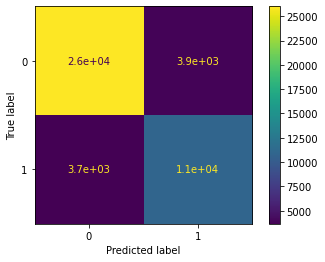

In [140]:
plot_confusion_matrix(gbdt,X,Y)

In [141]:
print(f"Recall score for training data using GBDT is : {26000 / (26000+3900)}")

Recall score for training data using GBDT is : 0.8695652173913043


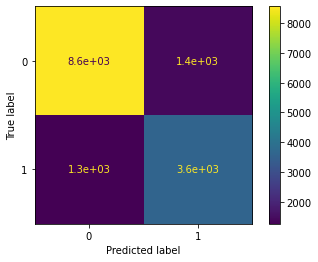

In [142]:
plot_confusion_matrix(gbdt,x,y)

In [143]:
print(f"Recall score for test data using GBDT is : {8600 / (8600+1400)}")


Recall score for test data using GBDT is : 0.86


<h3><I>4.XGBOOST

In [145]:
import xgboost as xgb
model_4 = xgb.XGBClassifier()

In [153]:
params = {'max_depth': [1,3,7,10,15,20,31,51,61,71,81,91,100]}
cross_val = RandomizedSearchCV(model_4, params)
cross_val.fit(X,Y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid=

In [154]:
x_boost = cross_val.best_estimator_
x_boost.fit(X,Y)
pickle.dump(x_boost,open('/content/xgboost.pkl','wb'))

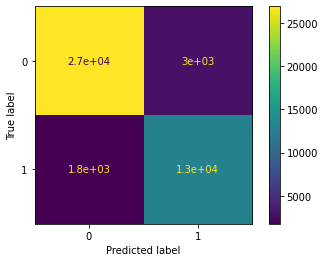

In [155]:
plot_confusion_matrix(x_boost,X,Y)

In [8]:
print(f"Recall score for train data using XGBoost: {27000/(27000+3000)}")

Recall score for train data using XGBoost: 0.9


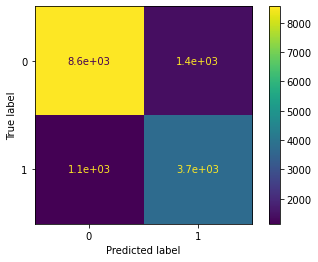

In [156]:
plot_confusion_matrix(x_boost,x,y)

In [7]:
print(f"Recall score on test data for Xgboost : {8600/(8600+1400)}")

Recall score on test data for Xgboost : 0.86


In [152]:
import pickle
pickle.dump(lr,open('/content/lr.pkl','wb'))

In [150]:
pickle.dump(rf,open('/content/rf.pkl','wb'))

In [151]:
pickle.dump(gbdt,open('/content/gbdt.pkl','wb'))

<h1><I>8. Inference

In [40]:
inf_data_org = pd.read_csv('/content/test.csv')
inf_data = inf_data_org.copy()

In [41]:
inf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB


In [42]:
col_to_be_dropped = ['Id','Family_Hist_3', 
                     'Family_Hist_5', 
                     'Medical_History_10', 
                     'Medical_History_15', 
                     'Medical_History_24', 
                     'Medical_History_32']
def preprocessing_inf(data,train_data,encoder,norm_model):
  data.drop(col_to_be_dropped,axis=1,inplace=True)
  data = fill_na(data,train_data)
  cat_vec = encoder.transform(data['Product_Info_2'].values.reshape(-1,1)).todense()
  data.drop('Product_Info_2',axis=1,inplace=True)
  data = np.hstack((data.values,cat_vec))
  data = norm_model.transform(data)

  return data

In [43]:
inf_data = preprocessing_inf(inf_data,data_c,one_hot_encoder,scaler_model)

In [101]:
inf_data.shape

(19765, 138)

In [73]:
rf = pickle.load(open('/content/rf.pkl','rb'))

In [107]:
inf_data.shape[0] - rf.predict(inf_data).sum()

19541

In [44]:
lr = pickle.load(open('/content/lr.pkl','rb'))
inf_data.shape[0] - lr.predict(inf_data).sum()

1103

In [74]:
gbdt = pickle.load(open('/content/gbdt.pkl','rb'))
inf_data.shape[0] - gbdt.predict(inf_data).sum()

19645

In [54]:
lr.coef_ > 0.1

array([[False, False,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True,  True, False,
        False, False, False,  True, False, False, False, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
      

In [100]:
a = np.random.normal(size=(10,138))

In [101]:
print(lr.predict(a))
print(rf.predict(a))
print(gbdt.predict(a))


[0 0 1 0 1 0 0 0 0 1]
[0 0 0 1 1 0 0 0 0 1]
[0 0 0 1 1 0 0 0 0 1]


In [103]:
def load_model(path):
  model = pickle.load(open(path,'rb'))
  return model

In [106]:
def predict(model_path, inp_array_of_size_138):
  model = load_model(model_path)
  return model.predict(inp_array_of_size_138)


In [107]:
path = '/content/rf.pkl'
predict(path,a)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1])